In [1]:
%matplotlib inline

import os
import sys
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

from utils import GLOBAL, functions

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('chained_assignment', None)

In [3]:
#Import yearly stats
stats_df = pd.read_csv(GLOBAL.STATS_2020)

#Override FantasyPoints Column with your League scoring
stats_df['FantasyPoints'] = functions.scoringCalculator(
    stats_df['Rec'], stats_df['ReceivingYds'], stats_df['ReceivingTD'], stats_df['FumblesLost'], stats_df['RushingYds'], stats_df['RushingTD'], stats_df['PassingYds'], stats_df['PassingTD'], stats_df['Int'], GLOBAL.PPR_SCORING
)

In [4]:
#Set Pts/G
stats_df['Pts/G'] = round((stats_df['FantasyPoints'] / stats_df['G']), 2)

#Set Usage/G (Tgts + RushingAtt)
stats_df['Usage/G'] = round((stats_df['Tgt'] + stats_df['RushingAtt']) / stats_df['G'], 2)

In [5]:
#Set up separate DFs by Pos
rb_stats_df = stats_df[stats_df['Pos'] == 'RB']
wr_stats_df = stats_df[stats_df['Pos'] == 'WR']
te_stats_df = stats_df[stats_df['Pos'] == 'TE']
qb_stats_df = stats_df[stats_df['Pos'] == 'QB']

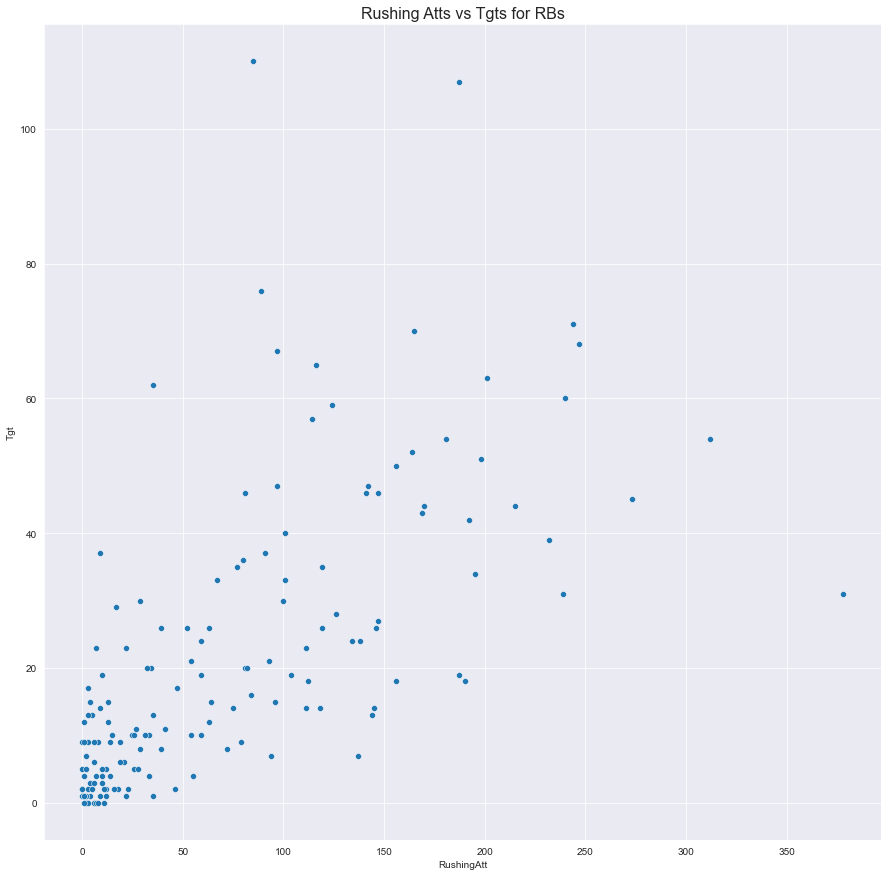

In [6]:
#Rushing Attempts vs Targets for RBs
sns.set_style('darkgrid')

plt.figure(figsize=(15, 15))
plt.title('Rushing Atts vs Tgts for RBs', fontsize=16)

sns.scatterplot(x=rb_stats_df['RushingAtt'], y=rb_stats_df['Tgt']);

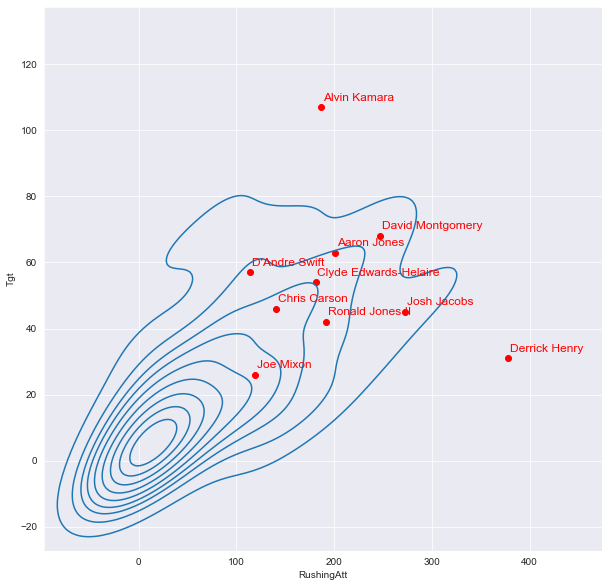

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

notable_players = ['Derrick Henry', 'Alvin Kamara', 'Johnathan Taylor', 'Miles Sander', 'Aaron Jones', 'Josh Jacobs', 'Chris Carson', 'Joe Mixon', 'Ronald Jones II', 'D\'Andre Swift', 'David Montgomery', 'Clyde Edwards-Helaire']

for player_name in notable_players:
    player = rb_stats_df[rb_stats_df['Player'] == player_name]

    if not player.empty:
        targets = player['Tgt']
        rushes = player['RushingAtt']

        ax.annotate(player_name, xy=(rushes+2, targets+2), color='red', fontsize=12)
        ax.scatter(rushes, targets, color='red')

sns.kdeplot(x=rb_stats_df['RushingAtt'], y=rb_stats_df['Tgt']);

<Figure size 1080x1080 with 0 Axes>

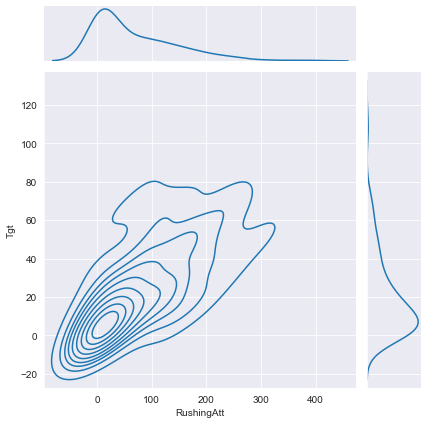

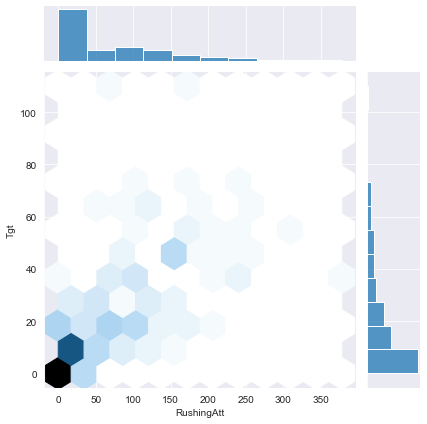

In [8]:
plt.figure(figsize=(15, 15))

sns.jointplot(x=rb_stats_df['RushingAtt'], y=rb_stats_df['Tgt'], kind='kde');

sns.jointplot(x=rb_stats_df['RushingAtt'], y=rb_stats_df['Tgt'], kind='hex');

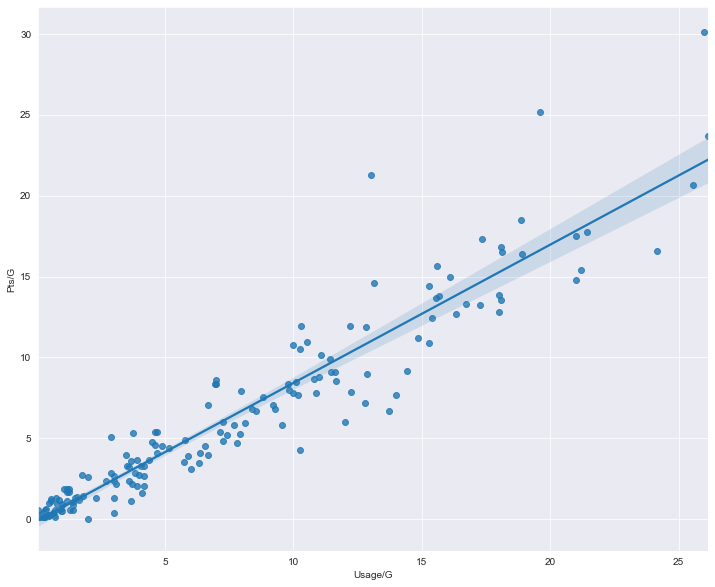

In [9]:
#RB Usage/G vs Pts/G Regression Plot
plt.figure(figsize=(12, 10))

sns.regplot(x=rb_stats_df['Usage/G'], y=rb_stats_df['Pts/G']);

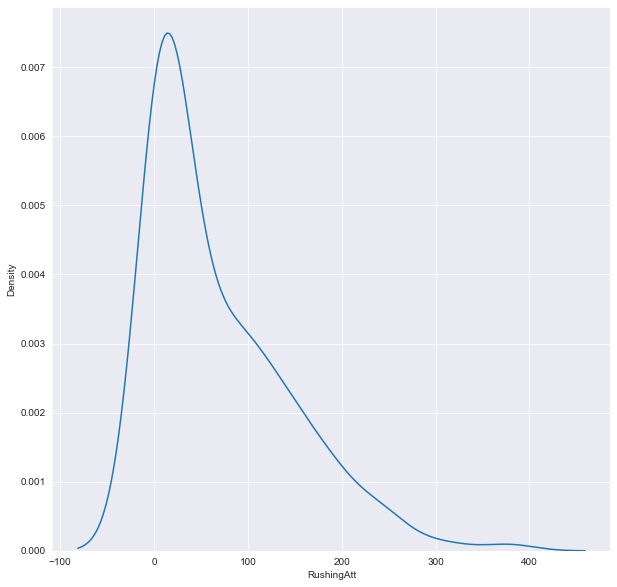

In [10]:
#Dist of RB carries
plt.figure(figsize=(10, 10))
sns.kdeplot(rb_stats_df['RushingAtt']);

<Figure size 720x720 with 0 Axes>

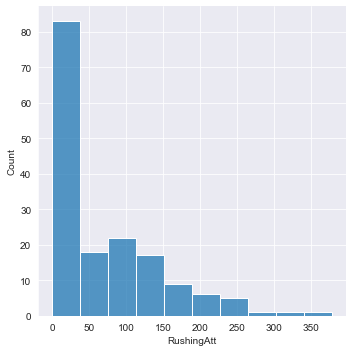

In [11]:
plt.figure(figsize=(10, 10))
sns.displot(rb_stats_df['RushingAtt']);

<Figure size 720x720 with 0 Axes>

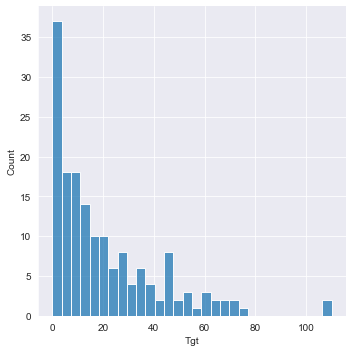

In [12]:
plt.figure(figsize=(10, 10))
sns.displot(rb_stats_df['Tgt'], bins=30);

<Figure size 720x720 with 0 Axes>

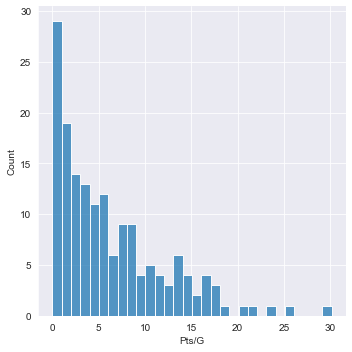

In [13]:
#FFPts/G for RBs
plt.figure(figsize=(10, 10))
sns.displot(rb_stats_df['Pts/G'], bins=30);

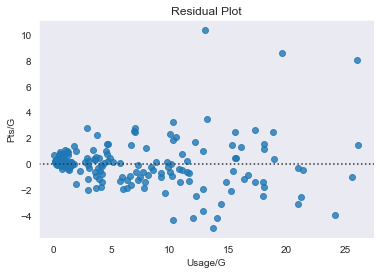

In [14]:
sns.set_style('dark')
sns.residplot(x=rb_stats_df['Usage/G'], y=rb_stats_df['Pts/G'])
plt.title('Residual Plot')
plt.xlabel('Usage/G')
plt.ylabel('Pts/G');

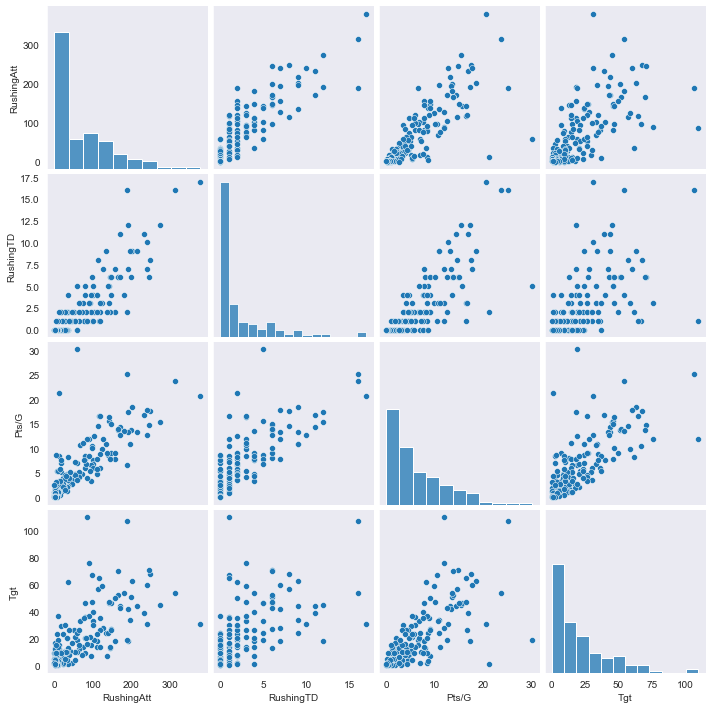

In [15]:
rb_stats_df_copy = rb_stats_df[[
    'RushingAtt',
    'RushingTD',
    'Pts/G',
    'Tgt'
]]

sns.pairplot(rb_stats_df_copy)

In [16]:
final_df = pd.DataFrame()

final_df = functions.scoreByWeek(final_df, '2019', 1, 18)

In [25]:
lamar_jackson = final_df.loc[final_df['Player'] == 'Lamar Jackson']
patrick_mahomes = final_df.loc[final_df['Player'] == 'Patrick Mahomes']
russell_wilson = final_df.loc[final_df['Player'] == 'Russell Wilson']

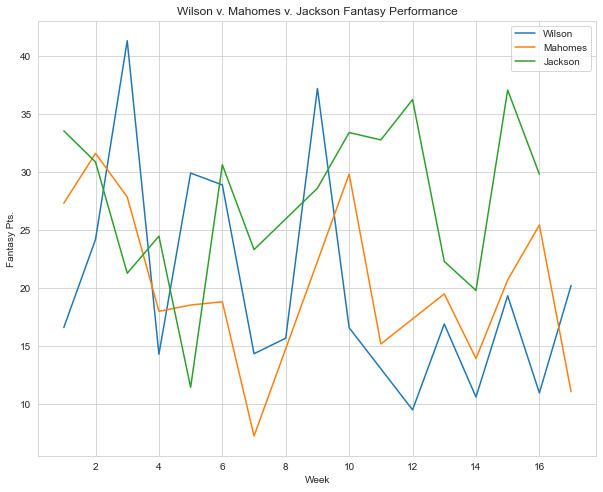

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.plot(russell_wilson['Week'], russell_wilson['StandardFantasyPoints'])
plt.plot(patrick_mahomes['Week'], patrick_mahomes['StandardFantasyPoints'])
plt.plot(lamar_jackson['Week'], lamar_jackson['StandardFantasyPoints'])
plt.legend(['Wilson', 'Mahomes', 'Jackson'])
plt.xlabel('Week')
plt.ylabel('Fantasy Pts.')
plt.title('Wilson v. Mahomes v. Jackson Fantasy Performance');

In [30]:
lamar_jackson.corr()[['StandardFantasyPoints']]

,StandardFantasyPoints
PassingYds,0.415339
PassingTD,0.625982
Int,-0.698805
PassingAtt,-0.313310
Cmp,-0.086869
RushingAtt,-0.295666
RushingYds,0.139054
RushingTD,-0.090980
Rec,NaN
Tgt,NaN
